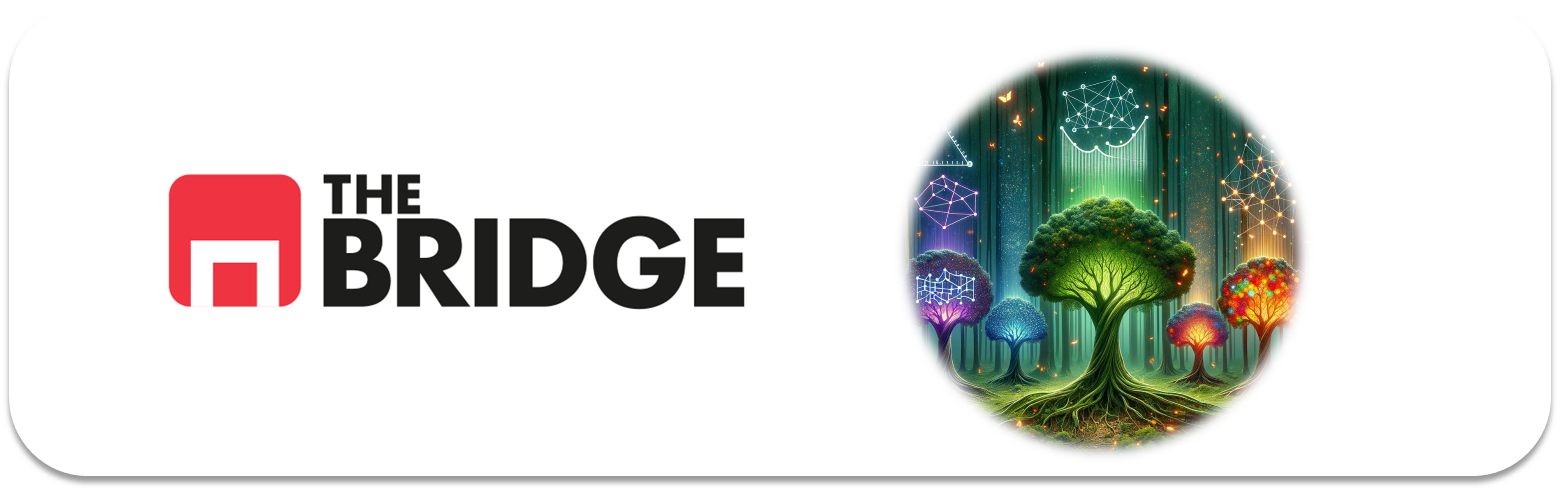

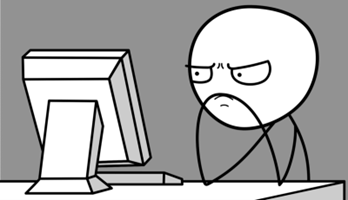

Para ejercitarte y afianzar lo aprendido sobre **Bagging y Boosting**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0.1

Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Ejercicio 0.2

Carga el dataset conocido como Mnist y vuélcalo en un array en numpy. Ejecuta la siguiente celda:

In [8]:
df = pd.read_csv('./data/mnist_csv')
df.info()
array_df=df.to_numpy()
print(array_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, pixel1 to numero
dtypes: int64(785)
memory usage: 6.0 MB
[[0 0 0 ... 0 0 5]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 6]]


### Ejercicio 1

Muestra el contenido del dataset, las primersas 5 filas. Y luego utiliza la función que tienes a continuaicón para mostrar cada instancia de una forma gráfica. Muestra las cinco primeras y el target de las mismas

In [9]:
df.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,numero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [36]:
print(df.dtypes)

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
numero      int64
Length: 785, dtype: object


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mnist_images(images, bck_white = False):
    """
    Función para mostrar imágenes del dataset MNIST.

    :param images: Array de numpy con múltiples imágenes, cada una de 784 elementos.
    """
    # Número de imágenes
    num_images = len(images)

    # Crear una cuadrícula de subplots
    cols = int(np.sqrt(num_images))
    rows = (num_images // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_images:
            # Convertir cada imagen de 784 elementos a un array 2D de 28x28
            img_matrix = images[i].reshape(28, 28)

            # Mostrar la imagen
            ax.imshow(img_matrix, cmap='gray' if not bck_white else "binary" )

            # Quitar los ejes
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()



In [37]:
# Extraer etiquetas (primera columna)
etiquetas = df.iloc[:,0].to_numpy()

# Extraer datos de píxeles (resto de columnas)
pixeles = df.iloc[:, 1:].to_numpy()

In [38]:

images=np.array([fila.reshape(28,28) for fila in pixeles])

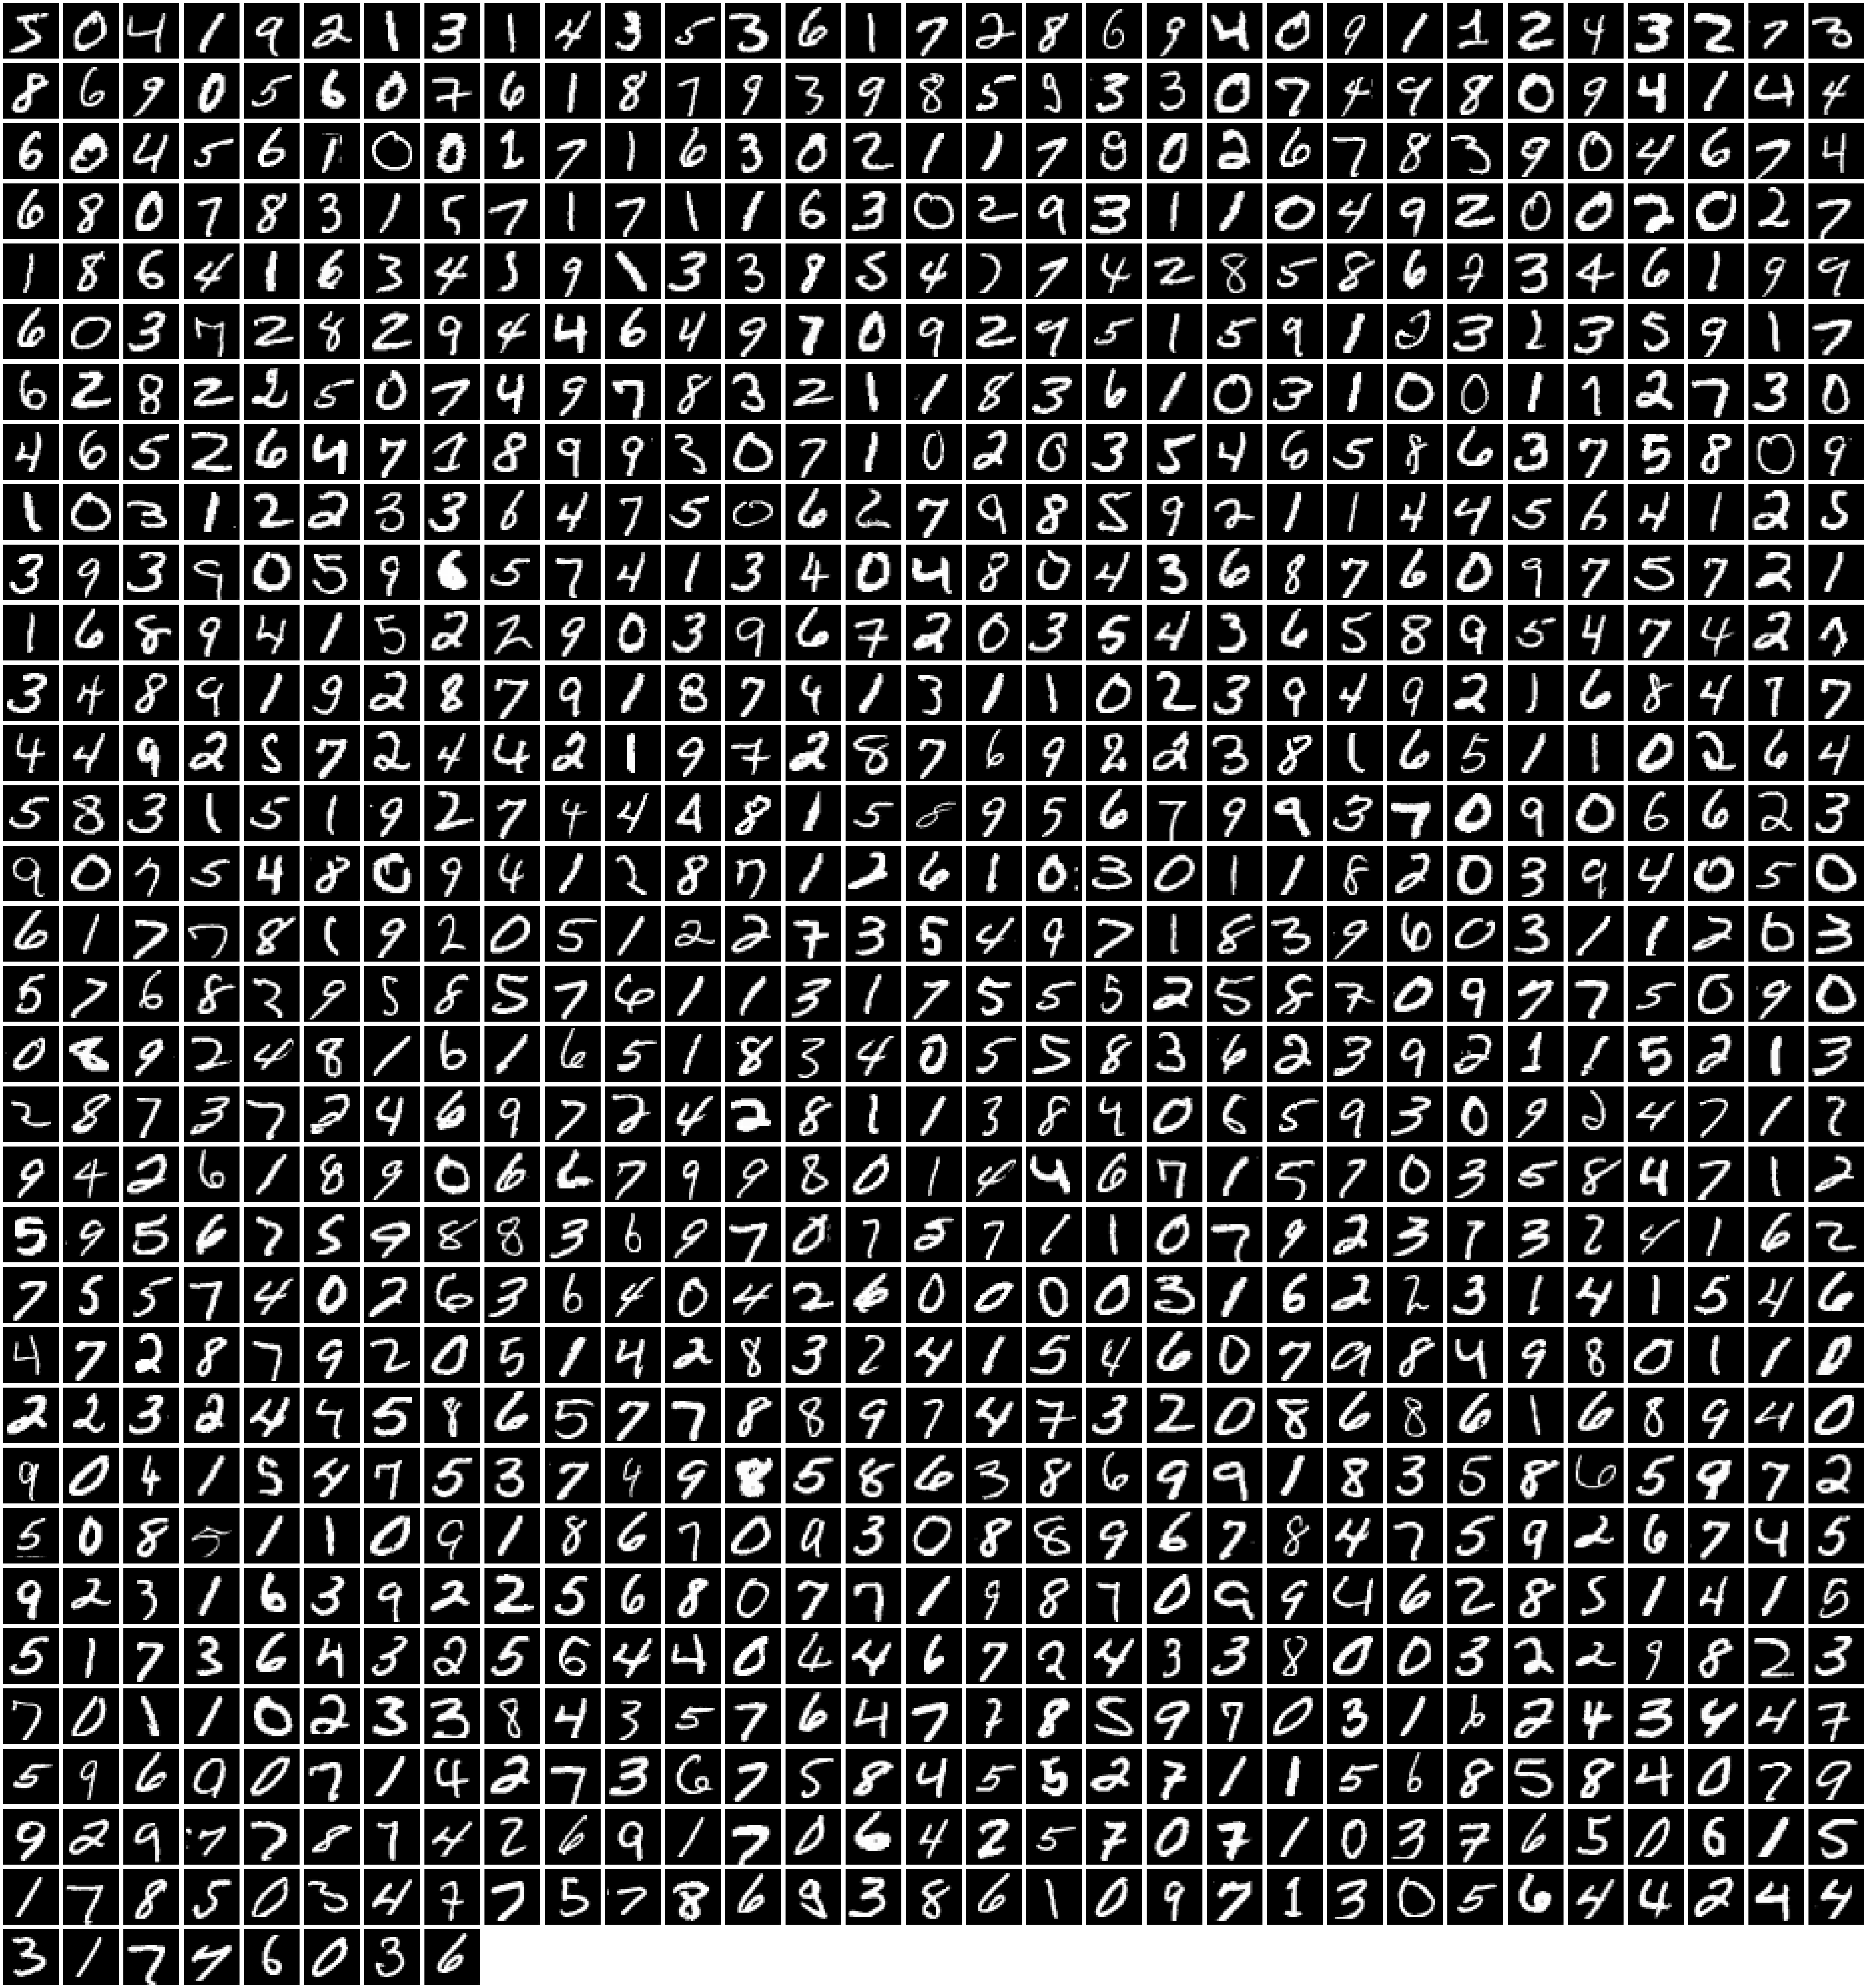

In [39]:
plot_mnist_images(images, bck_white = False)

¿Cuántos pixeles tiene de alto y ancho cada imagen?

### Ejercicio 2

Separa en train y test. Muestra el número de instancias para cada grupo

In [46]:

from sklearn.model_selection import train_test_split

X=df.iloc[:,1:]
y=df.iloc[:,0]


In [47]:
X=X.astype(np.float64)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=55)

### Ejercicio 3

Entrena un clasificador basado en Random Forest. Haz la predicción sobre los 5 primeros elementos del dataset de train y comprueba visualmente cuánto ha acertado.

In [49]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100,
                                random_state=42)

clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [50]:
# Seleccionar las primeras cinco instancias del conjunto de entrenamiento
X_train_first5 = X_train[:5]

# Realizar predicciones
predicciones = clf.predict(X_train_first5)

### Ejercicio 4

Pruébalo contra test y muestra su informe de clasificación

In [53]:

from sklearn.metrics import classification_report

# Obtener el informe de clasificación para las predicciones de los primeros 5 elementos
informe = classification_report(y_train[:5], predicciones)

# Imprimir el informe de clasificación
print("Informe de clasificación:\n", informe)

Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



### Ejercicio 5

Obten la feature importance del modelo pero muéstrala como una imagen para que veamos que píxeles son más importantes (hay tantos coeficientes como píxeles, recuerda). PISTA: Igual puedes usar parte del código de la función anterior o todo.

### Ejercicio 6 

Entrena ahora un ensamblado basado en el Gradient Boosted Trees de sklearn. Muestra la predicción de los números en las posiciones 20 a 25 de train y su target.

### Ejercicio 7

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 8

Entrena ahora un ensamblado basado en XGBoost. Muestra la predicción de los números en las posiciones 50 a 55 de train y su target.

### Ejercicio 9

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 10

Entrena ahora un ensamblado basado en LightGBM. Muestra la predicción de los números en las posiciones 125 a 130 de train y su target.

### Ejercicio 11

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 12

Entrena ahora un ensamblado basado en CatBoost. Muestra la predicción de los números en las posiciones 305 a 310 de train y su target.

### Ejercicio 13

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 14

A la vista de los resultados, ¿con qué modelo te quedarías?